In [ ]:
%pip install networkx

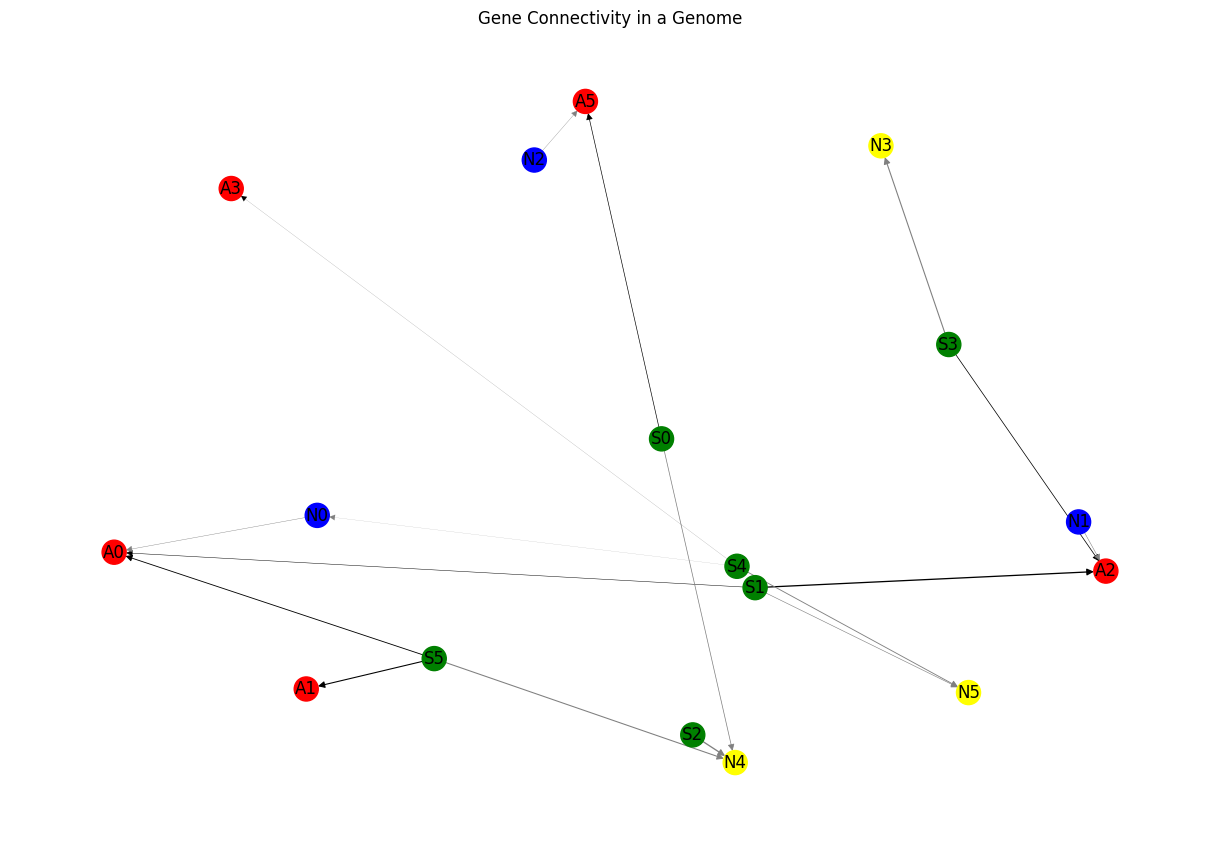

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# Sample data creation based on the provided classes
class Gene:
    def __init__(self, source_type, source_num, sink_type, sink_num, weight):
        self.source_type = source_type
        self.source_num = source_num
        self.sink_type = sink_type
        self.sink_num = sink_num
        self.weight = weight

class Genome:
    def __init__(self, genes=None):
        self.genes = genes if genes else []

    def add_connection(self, source_type, source_num, sink_type, sink_num, weight):
        gene = Gene(source_type, source_num, sink_type, sink_num, weight)
        self.genes.append(gene)

# Creating a sample genome with random connections
genome = Genome()
for _ in range(20):
    genome.add_connection(random.choice([0, 1]), random.randint(0, 5),
                          random.choice([0, 1]), random.randint(0, 5),
                          random.uniform(-1, 1))

# Network visualization
G = nx.DiGraph()

# Adding nodes and edges from the Genome
for gene in genome.genes:
    source = f'{"N" if gene.source_type == 0 else "S"}{gene.source_num}'
    sink = f'{"N" if gene.sink_type == 0 else "A"}{gene.sink_num}'

    G.add_node(source, color='blue' if gene.source_type == 0 else 'green')
    G.add_node(sink, color='red' if gene.sink_type == 1 else 'yellow')
    G.add_edge(source, sink, weight=abs(gene.weight), color='black' if gene.source_type == gene.sink_type else 'grey')

# Node colors
node_colors = [G.nodes[node]['color'] for node in G.nodes]

# Edge weights and colors
edge_colors = [G[u][v]['color'] for u, v in G.edges]
edge_weights = [G[u][v]['weight'] for u, v in G.edges]

# Drawing the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=node_colors, edge_color=edge_colors, width=edge_weights, with_labels=True)
plt.title("Gene Connectivity in a Genome")
plt.show()